In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
g1= nx.read_edgelist('/content/facebook_combined (1).txt.gz', create_using = nx.Graph(), nodetype= int)
print (nx.info(g1))

Graph with 0 nodes and 0 edges


In [4]:
# reading and creating networkx netwwork for specific county

def get_network(f):
    
  graph_i = pd.read_csv(f,header=None)

  graph_i = graph_i.values
  graph_i
  G = nx.Graph()
  G.add_edges_from(graph_i)
  num_nodes = G.number_of_nodes()
  print(num_nodes)
  return G
# type(graph_i)

g1 = get_network('/content/ga_contact_network_config_min_5_max_100_alpha_400_2-cm-13001.GraphEdge.txt')

16489


In [5]:
from typing import Dict, List, Optional, Set, Tuple
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import copy


def simulate_one_round_SI(
    G: nx.Graph,
    node_compartments: Dict[str, Set[int]],
    beta: float,
    rng: np.random.RandomState = np.random.RandomState(0),
):
    if len(node_compartments["I"]) == 0 or len(node_compartments["S"]) == 0:
        return node_compartments
    s_to_i = []
    for node in node_compartments["I"]:
        for neighbor in set(G.neighbors(node)).intersection(node_compartments["S"]):
            if rng.rand() < beta:
                s_to_i.append(neighbor)
    for node in set(s_to_i):
        node_compartments["S"].remove(node)
        node_compartments["I"].add(node)
    return node_compartments


def simulate_t_steps_SI(
    G: nx.Graph,
    i_frac: float,
    beta: float,
    num_rounds: int,
    seed: Optional[int],
    full_output: bool = False,
):
    rng = np.random.RandomState(seed) if seed is not None else np.random.RandomState()

    num_nodes = G.number_of_nodes()
    i_num = int(i_frac * num_nodes)
    s_num = num_nodes - i_num
    nodes_perm = rng.permutation(G.nodes)
    node_compartments = {
        "S": set(nodes_perm[:s_num].tolist()),
        "I": set(nodes_perm[s_num:].tolist()),
    }
    s = [s_num]
    i = [i_num]
    if full_output:
        s_full = [copy.deepcopy(node_compartments["S"])]
        i_full = [copy.deepcopy(node_compartments["I"])]

    for _ in range(num_rounds):
        node_compartments = simulate_one_round_SI(G, node_compartments, beta, rng)
        if full_output:
            s_full.append(copy.deepcopy(node_compartments["S"]))
            i_full.append(copy.deepcopy(node_compartments["I"]))
        s.append(len(node_compartments["S"])) # How many are in I each time-step 
        i.append(len(node_compartments["I"])) # There are 201 time-steps
    ans = {"S": np.array(s), "I": np.array(i)}
    if full_output:
        return ans, s_full, i_full
    return ans


In [7]:
#def simulate_t_steps_SI( G: nx.Graph, i_frac: float, beta: float, num_rounds: int, seed: Optional[int],full_output: bool = False,)

i_frac = 4/4039 # Initial number of infected nodes!
beta = 0.005 # beta value 
num_rounds = 100 # Number of time-steps
full_output = False
num_iter = 1 # added parameter to the existing code
y_sum =[]
i_daily_s =[]

for j in range(num_iter):
  l = simulate_t_steps_SI(g1,i_frac,beta,num_rounds,full_output)
  y = (l['I'])/len(g1.nodes) # after 100 time-steps we have an array of Infected nodes
  yS = (l['S'])/len(g1.nodes)
  i_daily = []
  i_0 = 0
  for i in (y):
    i_daily.append(i - i_0)
    i_0 = i
  i_daily = np.array(i_daily)

  y_sum.append(y)
  i_daily_s.append(i_daily)


In [8]:
# averaging btw the iterations 

zee = np.mean(y_sum, axis =0)
zee_d = np.mean(i_daily_s, axis =0)
lst = list(range(len(zee_d)))

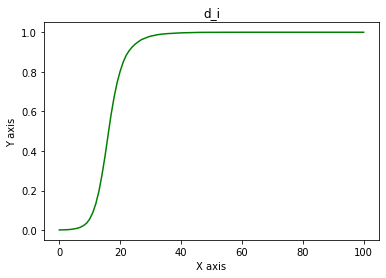

In [9]:
# plotting
plt.title("d_i")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(lst, zee, color ="green")
plt.show()